_/\__/\__/\__/\__/\__/\__/\__/\__/\__/\_
_/\__/\_MRA started with Haar wavelets
_/\__/\_resolution 0.5; dilation 3
_/\__/\_Orthogonal basis : Calculating coefficients of input function
_/\__/\_norm offset value : 1.0000050506758693
_/\__/\_total basis function : 41
_/\__/\_MRA Complete!
_/\__/\__/\__/\__/\__/\__/\__/\__/\__/\_
coeffiecients


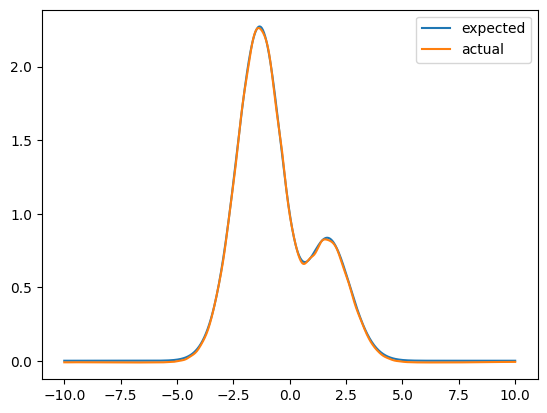

In [1]:
import mrafit.wavelet_bases as wavelet_bases
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
import seaborn as sns

def test_g4():
    
    """ This paramter controls how preicely you want to approximate a function, smaller the value better the approximation"""
    resolution = 0.5

    wid = 10
    N = 800
    error_bound = 10e-2 * resolution
    
    """ Use this section if you want to test gausslet with Stephen White's coefficients"""
    gb = wavelet_bases.GaussletBasis(resolution=resolution)

    """ Sample function to be approximated, you can change it as per your need"""
    X = np.linspace(-wid, wid, N)
    func = lambda x : np.exp(-x**2/3) * (x**2 - x + 1)
    coeffs, approx_func, error = gb.get_mra_approx(func, X)
    print("coeffiecients")
    
    y_expected = np.vectorize(func)(X)
    plt.plot(X, y_expected, label = "expected")
    plt.plot(X, approx_func, label = "actual")
    plt.legend()
    plt.show()
    
    mean_error = mae(approx_func, y_expected)
    assert mean_error <= error_bound, f"mean_error {mean_error}; error bound {error_bound}"

test_g4()
